In [9]:
# Notebook written by Shamima Rashid, Nanyang Technological University, Singapore. June 2022.
# XGBoost portions were adapted from: machinelearningmastery.com (Jason Brownlee). 
#Version Information:
#xgboost 1.5.1
#scipy 1.8.1

In [10]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
import scipy

In [11]:
fn1 = "Sites_final_Influenza.csv" #Cleaned datafile with 19911 records
                                  #Update with B-factor and try

In [12]:
###Only relevant features are selected in fields_1. Non-informative features (eg all zero columns, high correlation) identified with
### pandas profile report were removed 
fields_1 = ['Hydropathy', 'SS', 'RSA', 'PHI', 'PSI', 'main_chain_rel', 'all_polar_rel', 'CA_Up', 'CA_down', 'CA_PCB_Angle',
            'CA_Up.1','CA_down.1', 'CA_Count_r12',	'Residue_Depth','CA_Depth', 'B_Norm', 'Target'] #16 features
fields_2 = ['Hydropathy', 'SS', 'RSA', 'PHI', 'PSI', 'main_chain_rel', 'CA_Up', 'CA_down', 'CA_PCB_Angle', 
            'Residue_Depth','B_Norm', 'Target'] #11 features
# fields_3 = ['Hydropathy', 'SS', 'RSA', 'PHI', 'PSI', 'main_chain_rel', 'CA_Up', 'CA_down', 'CA_PCB_Angle', 'Residue_Depth','B_Norm']
# fields_4 = ['Hydropathy','SS','RSA','PHI','PSI','all_atoms_abs','all_atoms_rel','side_chain_abs',
#             'side_chain_rel','main_chain_abs','main_chain_rel',	'non_polar_abs','non_polar_rel',
#             'all_polar_abs', 'all_polar_rel', 'CA_Up', 'CA_down', 'CA_PCB_Angle', 'CA_Up.1', 
#             'CA_down.1', 'CA_Count_r12','Residue_Depth','CA_Depth','B_Norm', 'Target']

In [13]:
df = pd.read_csv(fn1, usecols=fields_1)
df = df.sample(frac=1) #shuffle the rows

In [14]:
Subtype = {"H1N1":0, "H3N2":1}
SS_Num = {"H":1, "E":2, "C":3}


### Feature Distribution and Importance

In [15]:
##Descriptive Statistics
#df.describe()
#df.head()

In [16]:
df['Target']= df['Target'].apply(lambda x: Subtype[x])
df['SS'] = df['SS'].apply(lambda x: SS_Num[x])

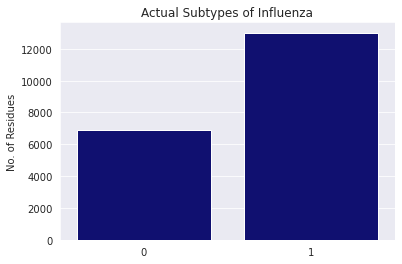

In [17]:
##Target Variable countplot
sns.set_style('darkgrid')
p = sns.countplot(x = 'Target', data=df, color='navy').set(title='Actual Subtypes of Influenza', ylabel= 'No. of Residues', xlabel='')


<AxesSubplot:xlabel='SS', ylabel='count'>

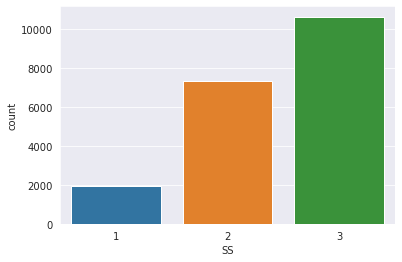

In [18]:
sns.countplot(x='SS', data = df)

In [19]:
pretty = {'PHI':"$\phi$'", 'PSI':"$\psi$", 'main_chain_rel':"Main Chain RSA", 
          'all_polar_rel':"All Polar RSA", 'CA_Up':"$C\alpha Up$", 'CA_down':"$C\alpha Down$", 
          'CA_PCB_Angle':"$C\alpha P C\beta Angle$ ", 'CA_Up.1':"$C\alpha Up.1$",'CA_down.1':"$C\alpha Down.1$", 
          'CA_Count_r12':"$C\alpha Count r12$",	'Residue_Depth':"Residue Depth",'CA_Depth':"$C\alpha Depth$", 'B_Norm':"B Norm"}    

/home/shamima/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shamima/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/shamima/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

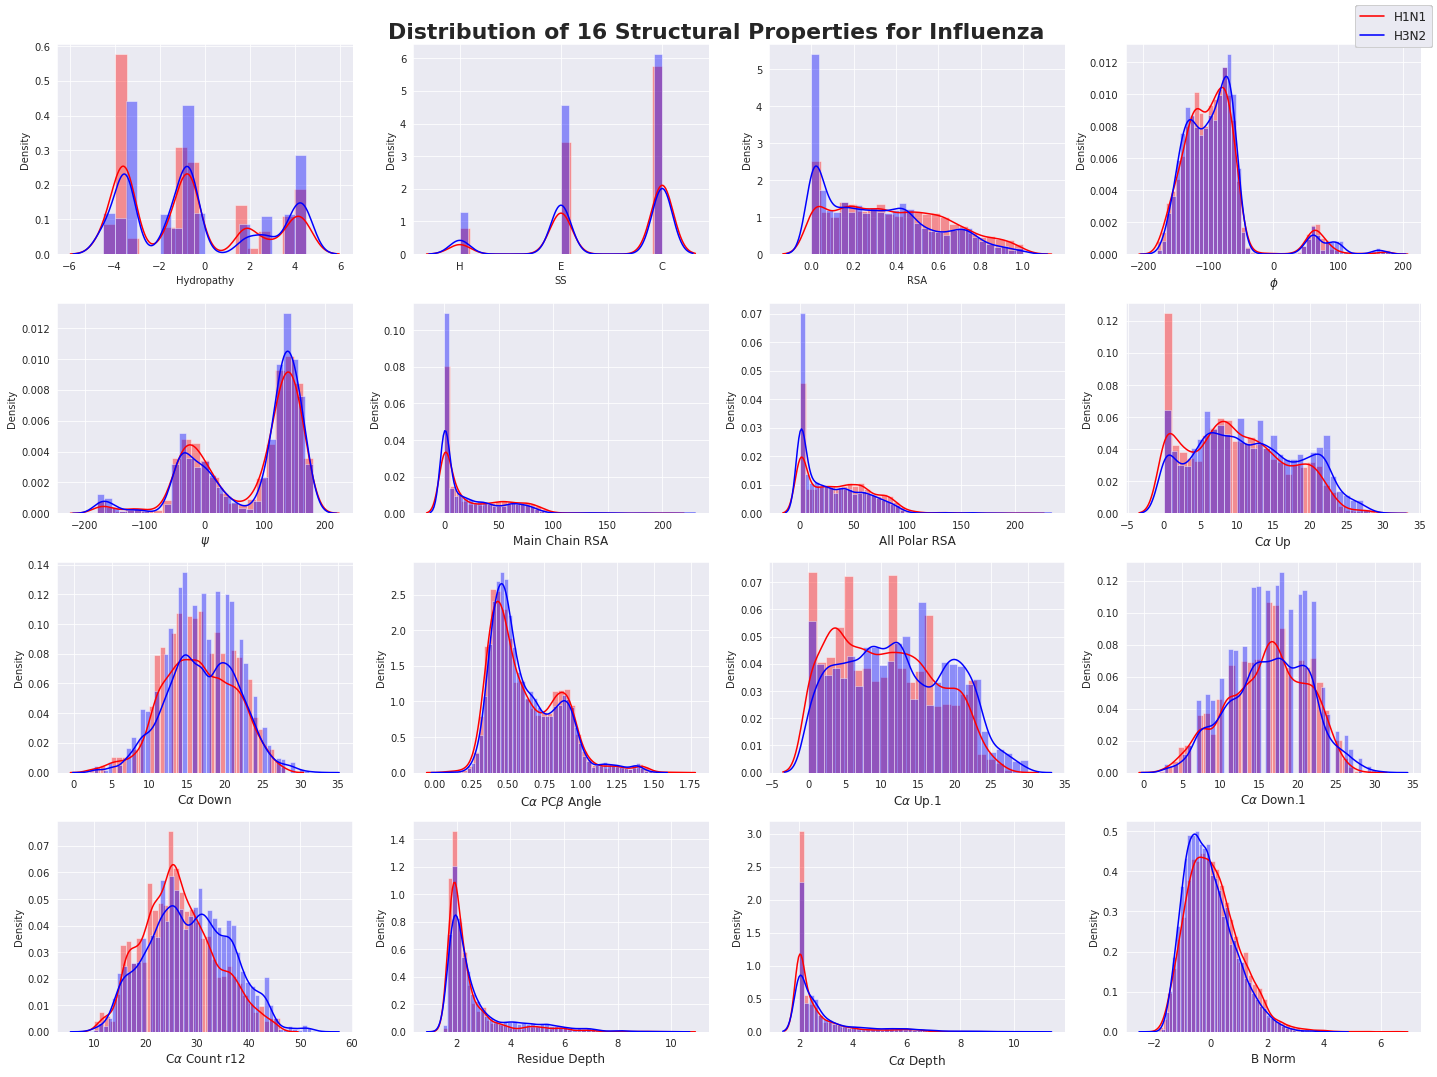

In [20]:
## Target variable plot seperations
idx_train = df['Target'].astype("bool").values
fig, axes = plt.subplots(4,4,figsize=(20,15))
sns.set_style('darkgrid')
axes = [x for a in axes for x in a]

pretty = {'PHI':"$\phi$", 'PSI':"$\psi$", 'main_chain_rel':"Main Chain RSA", 
          'all_polar_rel':"All Polar RSA", 'CA_Up':r'C$\alpha$ Up', 'CA_down':r'C$\alpha$ Down', 
          'CA_PCB_Angle':r'C$\alpha$ PC$\beta$ Angle', 'CA_Up.1':r'C$\alpha$ Up.1','CA_down.1':r'C$\alpha$ Down.1', 
          'CA_Count_r12':r'C$\alpha$ Count r12', 'Residue_Depth':"Residue Depth",'CA_Depth':r'C$\alpha$ Depth', 'B_Norm':"B Norm"}
for i,name in enumerate(fields_1[:-1]): #all columns in df except target
    value = df[name]
    sns.distplot(value[~idx_train],ax = axes[i], color='red')
    sns.distplot(value[idx_train],ax = axes[i], color = 'blue')
    if name in pretty:        
        axes[i].set_xlabel(pretty[name],fontsize=12)
        
    if name == 'SS':
        #x_labels = ['H', 'E', 'C']
        axes[i].set_xticks([1, 2, 3])
        axes[i].set_xticklabels(['H', 'E','C'])
  
    fig.suptitle('Distribution of 16 Structural Properties for Influenza', fontsize = 22, fontweight='bold')   
    fig.legend(labels = ["H1N1","H3N2"],loc="upper right",fontsize=12)
    fig.tight_layout()

In [21]:
#fig.savefig('Influenza_FeaturesDistPlot16.png', format='png', dpi=300, bbox_inches='tight')

In [40]:
F_names = fields_2[:-1]

X = df[F_names]
Y = df['Target']
X = X.to_numpy()
Y = Y.to_numpy()
print("X:", X.shape)
print("Y:", Y.shape)

X: (19922, 11)
Y: (19922,)


In [41]:
#Generate random target
#Fixed seed for reproducibility
np.random.seed(1)
R = [] 
rand_list = np.random.random(size=(len(Y)))
for i in rand_list:
    if i<0.5:
        a = 0
    else:
        a = 1
    R.append(a)

In [42]:
#Only for counting random subtypes
Subtype_r = {0:"H1N1", 1:"H3N2"}
List = []
for i in R:
    List.append(Subtype_r[i])

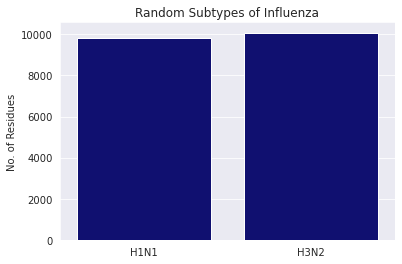

In [43]:
##Target Variable countplot
sns.set_style('darkgrid')
p = sns.countplot(x=List, color='navy').set(title='Random Subtypes of Influenza', ylabel= 'No. of Residues', xlabel='')

In [44]:
## GetXGBoost Feature Importance
model = XGBClassifier(importance_type ='gain', eval_metric='error', use_label_encoder=False)
model.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
importance=model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.13472
Feature: 1, Score: 0.11713
Feature: 2, Score: 0.09288
Feature: 3, Score: 0.07884
Feature: 4, Score: 0.10211
Feature: 5, Score: 0.07882
Feature: 6, Score: 0.10192
Feature: 7, Score: 0.11532
Feature: 8, Score: 0.06576
Feature: 9, Score: 0.06421
Feature: 10, Score: 0.04829


In [46]:
model = XGBClassifier(importance_type = 'gain', eval_metric='error', use_label_encoder=False)
model.fit(X, R)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

Feature: 0, Score: 0.08959
Feature: 1, Score: 0.09281
Feature: 2, Score: 0.09427
Feature: 3, Score: 0.09086
Feature: 4, Score: 0.09088
Feature: 5, Score: 0.09306
Feature: 6, Score: 0.08949
Feature: 7, Score: 0.08066
Feature: 8, Score: 0.09412
Feature: 9, Score: 0.09541
Feature: 10, Score: 0.08884


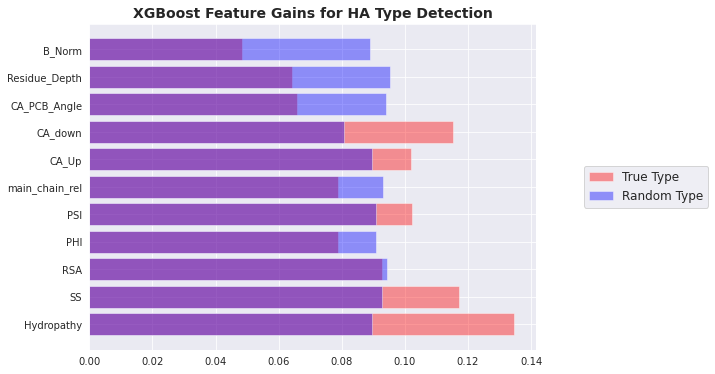

In [47]:
importanceR=model.feature_importances_
# summarize feature importance
for i,v in enumerate(importanceR):
	print('Feature: %0d, Score: %.5f' % (i,v))

fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.barh([F_names[x] for x in range(len(importance))], importance, alpha = 0.4, color = 'red')
ax.barh([F_names[x] for x in range(len(importanceR))], importanceR, alpha = 0.4, color = 'blue')
ax.set_title('XGBoost Feature Gains for HA Type Detection', fontsize=14, fontweight='bold')
ax.legend(labels = ["True Type","Random Type"],loc="center right",bbox_to_anchor=(1.4,0.5),fontsize=12)
plt.show()


In [48]:
#fig.savefig('HAGains_11Features.png', format='png', dpi=300, bbox_inches='tight')

In [49]:
# Test protocol.
#Prepare for actual Target and Randomly assigned H1N1 & H3N2 Labels

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state = 1)
XR_train, XR_test, R_train, R_test= train_test_split(X, R, test_size=0.25, random_state = 1)

In [58]:
model=XGBClassifier(importance_type = 'gain', eval_metric ='error', use_label_encoder=False)


In [59]:
model.fit(X_train, Y_train)
Y_hat = model.predict(X_test)

In [60]:
accuracy = accuracy_score(Y_test, Y_hat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.97


In [64]:
Rmodel=XGBClassifier(importance_type = 'gain', eval_metric = 'error', use_label_encoder=False)
Rmodel.fit(XR_train, R_train)
R_hat = model.predict(XR_test)

In [65]:
accuracy = accuracy_score(R_test, R_hat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 50.75


In [ ]:
#### Average of n runs

n = 100
ActualLabel = []
RandomLabel = []


for i in range(n):
   
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    XR_train, XR_test, R_train, R_test = train_test_split(X, R, test_size=0.25)
    model=XGBClassifier(importance_type ='gain', eval_metric='error', use_label_encoder=False)
    model.fit(X_train, Y_train)
    Y_hat = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_hat)
    ActualLabel.append(accuracy)
    print('Round %0d :'% (i))
    print('True Label Accuracy: %.2f' % (accuracy*100))
    Rmodel=XGBClassifier(importance_type = 'gain', eval_metric = 'error', use_label_encoder=False)
    Rmodel.fit(XR_train, R_train)
    R_hat = model.predict(XR_test)
    accuracy = accuracy_score(R_test, R_hat)
    RandomLabel.append(accuracy)
    print('Random Label Accuracy: %.2f' % (accuracy*100))
    


In [68]:
A1 = np.asarray(ActualLabel)
R1 = np.asarray(RandomLabel)

In [70]:
A1_mean = np.mean(A1)
A1_std = np.std(A1)
print('True mean: %.2f; True s.t.d: %.3f' %(A1_mean*100, A1_std))

True mean: 92.63; True s.t.d: 0.004


In [69]:
R1_mean = np.mean(R1)
R1_std = np.std(R1)
print('Random mean: %.2f; Random s.t.d: %.3f' %(R1_mean*100, R1_std))

Random mean: 50.66; Random s.t.d: 0.006
